In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

/home/rehna/dsa_c2/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df=pd.read_csv("Covid_tweets_US.csv")
df

,Unnamed: 0,created_at,text,place_full_name,place_type,retweet_count,Subjectivity,Polarity
0,0,2020-04-10T00:00:01Z,mayor janefortampa janecastor done amazing job...,"Florida, USA",admin,0.0,0.550000,Positive
1,1,2020-04-10T00:00:13Z,friend genezahas died fr coronavirus alamedaco...,"Oakland, CA",city,5.0,0.327778,Positive
2,2,2020-04-10T00:00:48Z,coronavirusoutbreak,"Los Angeles, CA",city,0.0,0.000000,Neutral
3,3,2020-04-10T00:00:53Z,keep questioning normal look like get nightmar...,"East Massapequa, NY",city,0.0,0.516667,Positive
4,4,2020-04-10T00:01:07Z,ask better view making call amykennedy tonight...,"Ventnor City, NJ",city,2.0,0.500000,Positive
...,...,...,...,...,...,...,...,...
357493,357507,2020-04-14T23:58:14Z,really funny people tweeple covid stayhome bit...,"Rancho Cucamonga, CA",city,0.0,1.000000,Positive
357494,357508,2020-04-14T23:58:48Z,famous santa monica stair shut covid lot folk ...,Santa Monica Stairs,poi,3.0,1.000000,Positive
357495,357509,2020-04-14T23:59:08Z,surreal nature daily covid routine first ita t...,Fulton Ranch Trail,poi,1.0,0.458333,Positive
357496,357510,2020-04-14T23:59:15Z,emerging covid research lhd team state respons...,"Burlington, VT",city,0.0,0.000000,Neutral


In [3]:
df=df.iloc[:,[2,7]]
df

,text,Polarity
0,mayor janefortampa janecastor done amazing job...,Positive
1,friend genezahas died fr coronavirus alamedaco...,Positive
2,coronavirusoutbreak,Neutral
3,keep questioning normal look like get nightmar...,Positive
4,ask better view making call amykennedy tonight...,Positive
...,...,...
357493,really funny people tweeple covid stayhome bit...,Positive
357494,famous santa monica stair shut covid lot folk ...,Positive
357495,surreal nature daily covid routine first ita t...,Positive
357496,emerging covid research lhd team state respons...,Neutral


In [4]:
positive = df[df['Polarity']=='Positive']
positive

,text,Polarity
0,mayor janefortampa janecastor done amazing job...,Positive
1,friend genezahas died fr coronavirus alamedaco...,Positive
3,keep questioning normal look like get nightmar...,Positive
4,ask better view making call amykennedy tonight...,Positive
5,lovely seder homemade matzah secret making mat...,Positive
...,...,...
357491,weirdest quarentine meal straight meatball sau...,Positive
357493,really funny people tweeple covid stayhome bit...,Positive
357494,famous santa monica stair shut covid lot folk ...,Positive
357495,surreal nature daily covid routine first ita t...,Positive


In [5]:
negative = df[df['Polarity']=='Negative']
negative

,text,Polarity
14,fear pestilence lay waste outside psalm tehili...,Negative
29,allegiant air say sport sponsorship unaffected...,Negative
31,hey fam serious question might starting change...,Negative
33,attorney derickalmena say visited client jail ...,Negative
37,reckless moron moment day day idiocracy stayho...,Negative
...,...,...
357469,tired covid djpeefunk stayhome houston texas,Negative
357475,trump cut u funding covering severity covid ch...,Negative
357476,thought fix issue leader follows outbreak epid...,Negative
357482,got beard rolling reason shave laid yes postin...,Negative


In [6]:
neutral = df[df['Polarity']=='Neutral']
neutral

,text,Polarity
2,coronavirusoutbreak,Neutral
6,watch philadelphia aerial drone footage covid ...,Neutral
9,message tfe u squad stopthespread flattenthecu...,Neutral
10,munity prays together stay together praytogeth...,Neutral
11,socialdistancing covid coronavirus backthefuck...,Neutral
...,...,...
357481,covidheroes covid,Neutral
357483,welp guess hook walmart google covid trumppres...,Neutral
357484,time drama time negativity time need forgive m...,Neutral
357492,leadership requires multitasking includes mana...,Neutral


Text(0.5,0,'Reviews')

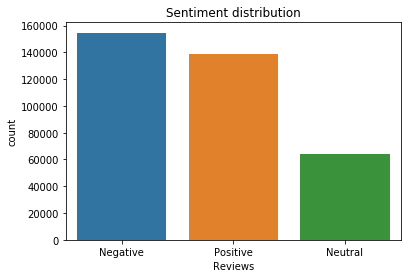

In [7]:
f = sns.countplot(x='Polarity', data=df)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Positive','Neutral'])
plt.xlabel("Reviews")

In [8]:
df

,text,Polarity
0,mayor janefortampa janecastor done amazing job...,Positive
1,friend genezahas died fr coronavirus alamedaco...,Positive
2,coronavirusoutbreak,Neutral
3,keep questioning normal look like get nightmar...,Positive
4,ask better view making call amykennedy tonight...,Positive
...,...,...
357493,really funny people tweeple covid stayhome bit...,Positive
357494,famous santa monica stair shut covid lot folk ...,Positive
357495,surreal nature daily covid routine first ita t...,Positive
357496,emerging covid research lhd team state respons...,Neutral


In [9]:
df=df.dropna()

In [10]:
df

,text,Polarity
0,mayor janefortampa janecastor done amazing job...,Positive
1,friend genezahas died fr coronavirus alamedaco...,Positive
2,coronavirusoutbreak,Neutral
3,keep questioning normal look like get nightmar...,Positive
4,ask better view making call amykennedy tonight...,Positive
...,...,...
357493,really funny people tweeple covid stayhome bit...,Positive
357494,famous santa monica stair shut covid lot folk ...,Positive
357495,surreal nature daily covid routine first ita t...,Positive
357496,emerging covid research lhd team state respons...,Neutral


In [11]:
train,test = train_test_split(df,test_size = 0.2,random_state=0,stratify = df.Polarity.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (285985, 2)
test shape :  (71497, 2)


In [12]:
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.text.values)
X_test = vectorizer.transform(test.text.values)

y_train = train.Polarity.values
y_test = test.Polarity.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)



X_train.shape :  (285985, 174589)
X_test.shape :  (71497, 174589)
y_train.shape :  (285985,)
y_test.shape :  (71497,)


In [13]:
naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("Train accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Test accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))


Train accuracy Score    :  0.8289630575030159
Test accuracy Score :  0.7870400156649929
              precision    recall  f1-score   support

    Negative       0.76      0.70      0.73     13858
     Neutral       0.64      0.96      0.77     18513
    Positive       0.93      0.73      0.82     39126

    accuracy                           0.79     71497
   macro avg       0.78      0.80      0.77     71497
weighted avg       0.82      0.79      0.79     71497



In [14]:
test['text'][0]

'mayor janefortampa janecastor done amazing job keeping resident cityoftampa healthy safe applauded work winning war covid leadership action'

In [15]:
X_test[0]

<1x174589 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [17]:
naiveByes_clf.predict(X_test[0])[0]

'Positive'